In [1]:
import numpy as np
import pandas as pd
#import pyreadr
from matplotlib import pyplot as plt
import seaborn as sns
import tabulate as tabulate
import csv
from IPython.display import display, HTML
plt.xkcd()

# Investment model A

In [2]:
lumpSum=194000
interestRate=0.05             # expected interest rate
#interestRate=0.1
chargesRate =0.0125            # charges for maintaing the trust
#chargesRate =0.0

In [3]:
year=[]
trustLumpSum=[]
withdrawals=[]

In [4]:
yearsTillUni=7
yearsUniStudy=5
fixedWithdrawal=lumpSum*0.05

In [5]:
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)

totalWithdrawals=0

print("\nInitial balance is £{:.2f}".format(lumpSum))
for iYear in range(yearsTillUni+yearsUniStudy):
    print("\nAnother year passed by, year={}".format(iYear+1))

    newStatement=trustLumpSum[-1]*(1+(interestRate-chargesRate))
    year.append(year[-1]+1)
    
    print("Current account balance is £{:.2f}".format(newStatement))
    
    if not iYear < yearsTillUni:
        print("Withdrawing £{} at the end of the year".format(fixedWithdrawal))
        totalWithdrawals += fixedWithdrawal
        newStatement -= fixedWithdrawal
        print("Balance after withdrawal is £{:.2f} ".format(newStatement))
    
    trustLumpSum.append(newStatement)
    withdrawals.append(0)
    
print("\n\nFinal summary:")
print("\tBalance is £{:.2f} total withdrawals are £{:.2f}".format(trustLumpSum[-1],totalWithdrawals))        


Initial balance is £194000.00

Another year passed by, year=1
Current account balance is £201275.00

Another year passed by, year=2
Current account balance is £208822.81

Another year passed by, year=3
Current account balance is £216653.67

Another year passed by, year=4
Current account balance is £224778.18

Another year passed by, year=5
Current account balance is £233207.36

Another year passed by, year=6
Current account balance is £241952.64

Another year passed by, year=7
Current account balance is £251025.86

Another year passed by, year=8
Current account balance is £260439.33
Withdrawing £9700.0 at the end of the year
Balance after withdrawal is £250739.33 

Another year passed by, year=9
Current account balance is £260142.06
Withdrawing £9700.0 at the end of the year
Balance after withdrawal is £250442.06 

Another year passed by, year=10
Current account balance is £259833.63
Withdrawing £9700.0 at the end of the year
Balance after withdrawal is £250133.63 

Another year passe

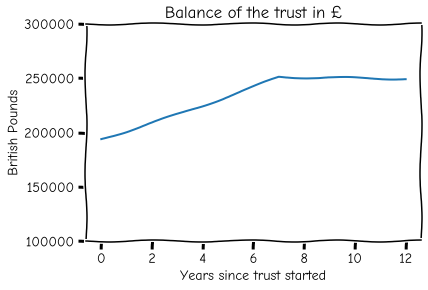

In [6]:
plt.plot(year,trustLumpSum)
plt.title("Balance of the trust in £")
plt.ylim([100000,300000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

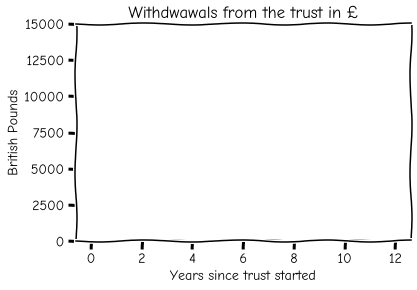

In [7]:
plt.plot(year,withdrawals)
plt.title("Withdwawals from the trust in £")
plt.ylim([0,15000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

# Investment model B

In [8]:
lumpSum=198000
year=[]
trustLumpSum=[]
withdrawals=[]

In [9]:
interestRate=0.05             # expected interest rate
freeChargesRate=0.007         # charges without limit
restrictedChargesRate=0.0014
restrictedCeiling=375

In [10]:
taxRate=0.45                  # tax on capital gains
taxEscape=2000                # tax escape on capital gains

In [11]:
yearsTillUni=7
yearsUniStudy=5
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)
fixedWithdrawal=lumpSum*0.05

In [12]:
print("\nInitial balance is £{:.2f}".format(lumpSum))
totalTax=0
totalWithdrawals=0
for iYear in range(yearsTillUni+yearsUniStudy):
    accountBalance=trustLumpSum[-1]
    print("\nAnother year passed by, year={}".format(iYear+1))
#    print("Current account balance after {} years is £{:.2f}".format(year[-1],accountBalance))
        
    interestGain=accountBalance*interestRate
    freeInterestCharge=accountBalance*freeChargesRate
    restrictedInterestCharge=accountBalance*restrictedChargesRate
    if restrictedInterestCharge > restrictedCeiling:
        restrictedInterestCharge=restrictedCeiling
    totalGain = interestGain-freeInterestCharge-restrictedInterestCharge    
    print("Interest Gain=£{:.2f} Free Interest Charge=£{:.2f} restricted Interest Charge=£{:.2f}, Total Gain={:.2f}"
          .format(interestGain,freeInterestCharge,restrictedInterestCharge,totalGain))
    
    taxDeduction = totalGain - taxEscape
    if taxDeduction > 0:
        taxDeduction = taxDeduction * taxRate
    else:
        taxDeduction = 0
        
    totalTax=totalTax+taxDeduction
    totalGain=totalGain-taxDeduction

    print("Tax deduction=£{:.2f} Gain after taxation=£{:.2f}".format(taxDeduction,totalGain))
          
    newStatement=accountBalance+totalGain

    print("Remaining balance is £{:.2f} ".format(newStatement))

    if not iYear < yearsTillUni:
        print("Withdrawing £{} at the end of the year".format(fixedWithdrawal))
        totalWithdrawals += fixedWithdrawal
        newStatement -= fixedWithdrawal
        print("Balance after withdrawal is £{:.2f} ".format(newStatement))

    year.append(year[-1]+1)
    trustLumpSum.append(newStatement)
    
print("\n\nFinal summary:")
print("\tBalance is £{:.2f} total tax paid is £{:.2f}  total withdrawals are £{:.2f}".format(trustLumpSum[-1],
                                                                totalTax,totalWithdrawals))    


Initial balance is £198000.00

Another year passed by, year=1
Interest Gain=£9900.00 Free Interest Charge=£1386.00 restricted Interest Charge=£277.20, Total Gain=8236.80
Tax deduction=£2806.56 Gain after taxation=£5430.24
Remaining balance is £203430.24 

Another year passed by, year=2
Interest Gain=£10171.51 Free Interest Charge=£1424.01 restricted Interest Charge=£284.80, Total Gain=8462.70
Tax deduction=£2908.21 Gain after taxation=£5554.48
Remaining balance is £208984.72 

Another year passed by, year=3
Interest Gain=£10449.24 Free Interest Charge=£1462.89 restricted Interest Charge=£292.58, Total Gain=8693.76
Tax deduction=£3012.19 Gain after taxation=£5681.57
Remaining balance is £214666.29 

Another year passed by, year=4
Interest Gain=£10733.31 Free Interest Charge=£1502.66 restricted Interest Charge=£300.53, Total Gain=8930.12
Tax deduction=£3118.55 Gain after taxation=£5811.56
Remaining balance is £220477.86 

Another year passed by, year=5
Interest Gain=£11023.89 Free Inter

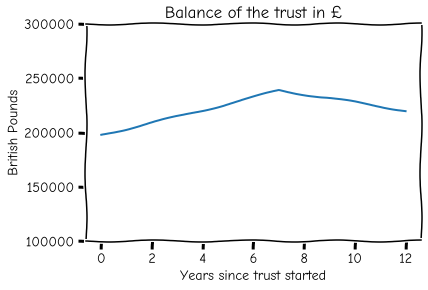

In [13]:
plt.plot(year,trustLumpSum)
plt.title("Balance of the trust in £")
plt.ylim([100000,300000])
plt.xlabel("Years since trust started")
plt.ylabel("British Pounds")
plt.show()

# Investment model C


In [14]:
lumpSum=198000
year=[]
trustLumpSum=[]
withdrawals=[]
taxPayments=[]

In [15]:
yearsTillUni=7
yearsUniStudy=5
year.append(0)
trustLumpSum.append(lumpSum)
withdrawals.append(0)
taxPayments.append(0)
fixedWithdrawal=lumpSum*0.05

In [16]:
interestRate=0.05             # expected interest rate
chargesRate =0.0125           # charges for maintaing the trust
taxRate=0.2                   # tax on gain
totalTaxAmount=0
totalWithdrawals=0


In [17]:
print("\nInitial balance is £{:.2f}".format(lumpSum))
for iYear in range(yearsTillUni+yearsUniStudy):
    print("\nAnother year passed by, year={}".format(iYear+1))
    accountBalance=trustLumpSum[-1]
    interestGain=accountBalance*interestRate
    interestCharge=accountBalance*chargesRate

    totalGain=interestGain-interestCharge
    taxAmount=totalGain*taxRate
    taxPayments.append(taxAmount)
    totalTaxAmount+=taxAmount
    
    accountBalance = accountBalance+totalGain-taxAmount 
    print("At the end of the year we paid tax £{:.2f} and remaining balance is £{:.2f} ".format(taxAmount,accountBalance))

    if not iYear < yearsTillUni:
        accountBalance -= fixedWithdrawal    
        totalWithdrawals += fixedWithdrawal
        print("withdrawing £{:.2f}, new balance is £{:.2f}".format(fixedWithdrawal,accountBalance))

    trustLumpSum.append(accountBalance)    


Initial balance is £198000.00

Another year passed by, year=1
At the end of the year we paid tax £1485.00 and remaining balance is £203940.00 

Another year passed by, year=2
At the end of the year we paid tax £1529.55 and remaining balance is £210058.20 

Another year passed by, year=3
At the end of the year we paid tax £1575.44 and remaining balance is £216359.95 

Another year passed by, year=4
At the end of the year we paid tax £1622.70 and remaining balance is £222850.74 

Another year passed by, year=5
At the end of the year we paid tax £1671.38 and remaining balance is £229536.27 

Another year passed by, year=6
At the end of the year we paid tax £1721.52 and remaining balance is £236422.35 

Another year passed by, year=7
At the end of the year we paid tax £1773.17 and remaining balance is £243515.03 

Another year passed by, year=8
At the end of the year we paid tax £1826.36 and remaining balance is £250820.48 
withdrawing £9900.00, new balance is £240920.48

Another year pas

In [18]:
print("\n\nFinal summary:")
print("\tBalance is £{:.2f} total tax paid is £{:.2f}  total withdrawals are £{:.2f}".format(trustLumpSum[-1],
                                                                totalTaxAmount,totalWithdrawals))



Final summary:
	Balance is £229740.21 total tax paid is £20310.05  total withdrawals are £49500.00
